<a href="https://colab.research.google.com/github/Swetha0713/STML_2024_2303A52415/blob/main/Assignment_12_stml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracies:
SVM: 0.7761
KNN: 0.7761
Logistic Regression: 0.7761


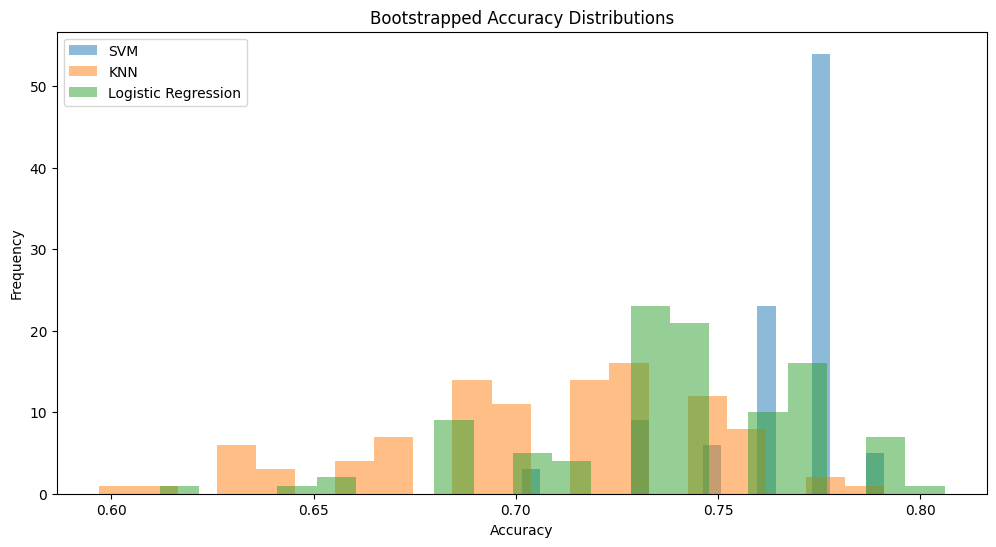

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Import resample from the correct module: sklearn.utils
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Data
file_path = '/content/breast_cancer_survival.csv'
data = pd.read_csv(file_path)

# Encode the categorical target variable 'Patient_Status'
data['Patient_Status'] = LabelEncoder().fit_transform(data['Patient_Status'])

# Select features and encode categorical variables
feature_columns = ['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']
features = data[feature_columns]
target = data['Patient_Status']

# One-hot encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Scale the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Train Models and Evaluate Accuracies
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Train each model and calculate accuracy
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, y_pred)

# Display accuracy for each model
print("Model Accuracies:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# Step 4: Bootstrap Accuracy Plots

# Number of bootstrap iterations
n_iterations = 100
accuracies_bootstrap = {model_name: [] for model_name in models.keys()}

# Bootstrap sampling
for _ in range(n_iterations):
    # Generate a bootstrap sample from the training set
    X_bootstrap, y_bootstrap = resample(X_train, y_train)

    # Train and evaluate each model on the bootstrap sample
    for model_name, model in models.items():
        model.fit(X_bootstrap, y_bootstrap)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies_bootstrap[model_name].append(accuracy)

# Step 5: Plot Bootstrap Accuracy Distributions
plt.figure(figsize=(12, 6))
for model_name, acc_list in accuracies_bootstrap.items():
    plt.hist(acc_list, bins=20, alpha=0.5, label=model_name)

plt.title("Bootstrapped Accuracy Distributions")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.show()
